In [47]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

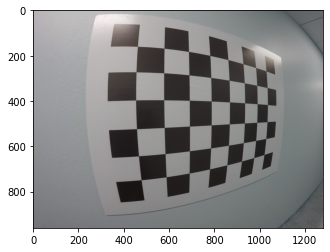

In [48]:
img = cv2.imread('calibration_wide/GOPR0032.jpg')
plt.imshow(img)

In [28]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [29]:
objp = np.zeros((6*8, 3), np.float32)
objp.shape

(48, 3)

In [30]:
objp

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [31]:
grid_mat = np.mgrid[0:8, 0:6]
grid_mat.shape

(2, 8, 6)

In [32]:
grid_mat

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7]],

       [[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]])

In [33]:
grid_mat_T = grid_mat.T
grid_mat_T.shape

(6, 8, 2)

In [34]:
grid_mat_T

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0],
        [5, 0],
        [6, 0],
        [7, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1],
        [4, 1],
        [5, 1],
        [6, 1],
        [7, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [5, 2],
        [6, 2],
        [7, 2]],

       [[0, 3],
        [1, 3],
        [2, 3],
        [3, 3],
        [4, 3],
        [5, 3],
        [6, 3],
        [7, 3]],

       [[0, 4],
        [1, 4],
        [2, 4],
        [3, 4],
        [4, 4],
        [5, 4],
        [6, 4],
        [7, 4]],

       [[0, 5],
        [1, 5],
        [2, 5],
        [3, 5],
        [4, 5],
        [5, 5],
        [6, 5],
        [7, 5]]])

In [35]:
grid_mat_T.reshape(-1, 2) # (48, 2)

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5],
       [6, 5],
       [7, 5]])

In [36]:
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

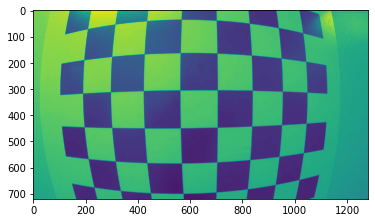

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [41]:
ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
ret, corners.shape, corners

(True,
 (48, 1, 2),
 array([[[ 209.49168 ,   72.759445]],
 
        [[ 314.52362 ,   54.58995 ]],
 
        [[ 435.51456 ,   42.035755]],
 
        [[ 567.81757 ,   36.470123]],
 
        [[ 702.005   ,   40.031147]],
 
        [[ 827.8688  ,   51.39282 ]],
 
        [[ 938.9422  ,   68.43589 ]],
 
        [[1032.1531  ,   88.22164 ]],
 
        [[ 195.65141 ,  190.71077 ]],
 
        [[ 301.68405 ,  178.15556 ]],
 
        [[ 426.42334 ,  168.19281 ]],
 
        [[ 563.9286  ,  163.79163 ]],
 
        [[ 704.30273 ,  165.36145 ]],
 
        [[ 835.97034 ,  172.888   ]],
 
        [[ 949.44946 ,  184.23866 ]],
 
        [[1043.4532  ,  197.34889 ]],
 
        [[ 190.99168 ,  317.9877  ]],
 
        [[ 297.00378 ,  312.99814 ]],
 
        [[ 423.02908 ,  308.16754 ]],
 
        [[ 562.5084  ,  305.60114 ]],
 
        [[ 705.7149  ,  305.5154  ]],
 
        [[ 838.9999  ,  307.0742  ]],
 
        [[ 954.1834  ,  310.37695 ]],
 
        [[1048.1006  ,  314.29034 ]],
 
        [[ 196.98315

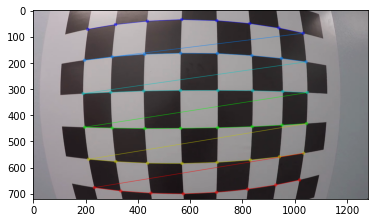

In [42]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
    plt.imshow(img)

In [72]:
images = glob.glob('calibration_wide/GOPR*.jpg')
images

['calibration_wide/GOPR0034.jpg',
 'calibration_wide/GOPR0035.jpg',
 'calibration_wide/GOPR0037.jpg',
 'calibration_wide/GOPR0036.jpg',
 'calibration_wide/GOPR0032.jpg',
 'calibration_wide/GOPR0033.jpg',
 'calibration_wide/GOPR0057.jpg',
 'calibration_wide/GOPR0043.jpg',
 'calibration_wide/GOPR0042.jpg',
 'calibration_wide/GOPR0068.jpg',
 'calibration_wide/GOPR0040.jpg',
 'calibration_wide/GOPR0054.jpg',
 'calibration_wide/GOPR0055.jpg',
 'calibration_wide/GOPR0041.jpg',
 'calibration_wide/GOPR0069.jpg',
 'calibration_wide/GOPR0045.jpg',
 'calibration_wide/GOPR0051.jpg',
 'calibration_wide/GOPR0050.jpg',
 'calibration_wide/GOPR0044.jpg',
 'calibration_wide/GOPR0052.jpg',
 'calibration_wide/GOPR0046.jpg',
 'calibration_wide/GOPR0047.jpg',
 'calibration_wide/GOPR0053.jpg',
 'calibration_wide/GOPR0062.jpg',
 'calibration_wide/GOPR0063.jpg',
 'calibration_wide/GOPR0049.jpg',
 'calibration_wide/GOPR0061.jpg',
 'calibration_wide/GOPR0060.jpg',
 'calibration_wide/GOPR0048.jpg',
 'calibration_

In [73]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [74]:
objp = np.zeros((6*8, 3), np.float32)
objp.shape

(48, 3)

In [75]:
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

In [76]:
for fname in images:
    img = cv2.imread('calibration_wide/GOPR0032.jpg')
#     plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

#         img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
#         plt.imshow(img)

In [77]:
gray.shape, gray.shape[::-1]

((960, 1280), (1280, 960))

In [78]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [79]:
ret

0.27540655598772495

In [80]:
mtx

array([[524.92168165,   0.        , 639.79721915],
       [  0.        , 525.64699291, 498.8334198 ],
       [  0.        ,   0.        ,   1.        ]])

In [81]:
dist

array([[-0.24124572,  0.10601627, -0.00050176,  0.00512275, -0.03370704]])

In [82]:
rvecs

[array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array([[ 0.0864583 ],
        [-0.30504423],
        [-0.02603129]]),
 array

In [83]:
tvecs

[array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array([[-1.48120636],
        [-2.78587322],
        [ 3.77176615]]),
 array

In [84]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
dst

array([[[188, 184, 183],
        [188, 184, 183],
        [189, 185, 184],
        ...,
        [192, 189, 181],
        [192, 189, 181],
        [193, 190, 182]],

       [[188, 184, 183],
        [188, 184, 183],
        [188, 184, 183],
        ...,
        [192, 188, 180],
        [193, 188, 180],
        [194, 190, 182]],

       [[188, 184, 183],
        [188, 184, 183],
        [188, 184, 183],
        ...,
        [194, 189, 181],
        [194, 188, 181],
        [195, 189, 182]],

       ...,

       [[136, 138, 139],
        [136, 138, 139],
        [136, 137, 139],
        ...,
        [110, 118, 118],
        [111, 119, 119],
        [112, 120, 120]],

       [[137, 139, 140],
        [136, 138, 139],
        [136, 137, 138],
        ...,
        [111, 119, 119],
        [112, 120, 120],
        [112, 120, 120]],

       [[135, 138, 139],
        [135, 138, 139],
        [134, 137, 138],
        ...,
        [113, 121, 121],
        [113, 121, 121],
        [113, 121, 121]]

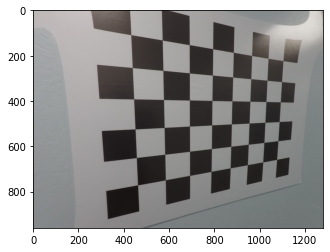

In [85]:
plt.imshow(dst)

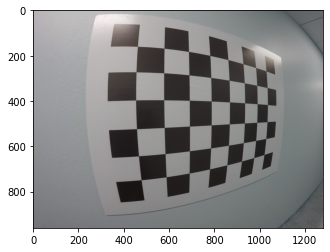

In [86]:
plt.imshow(img)

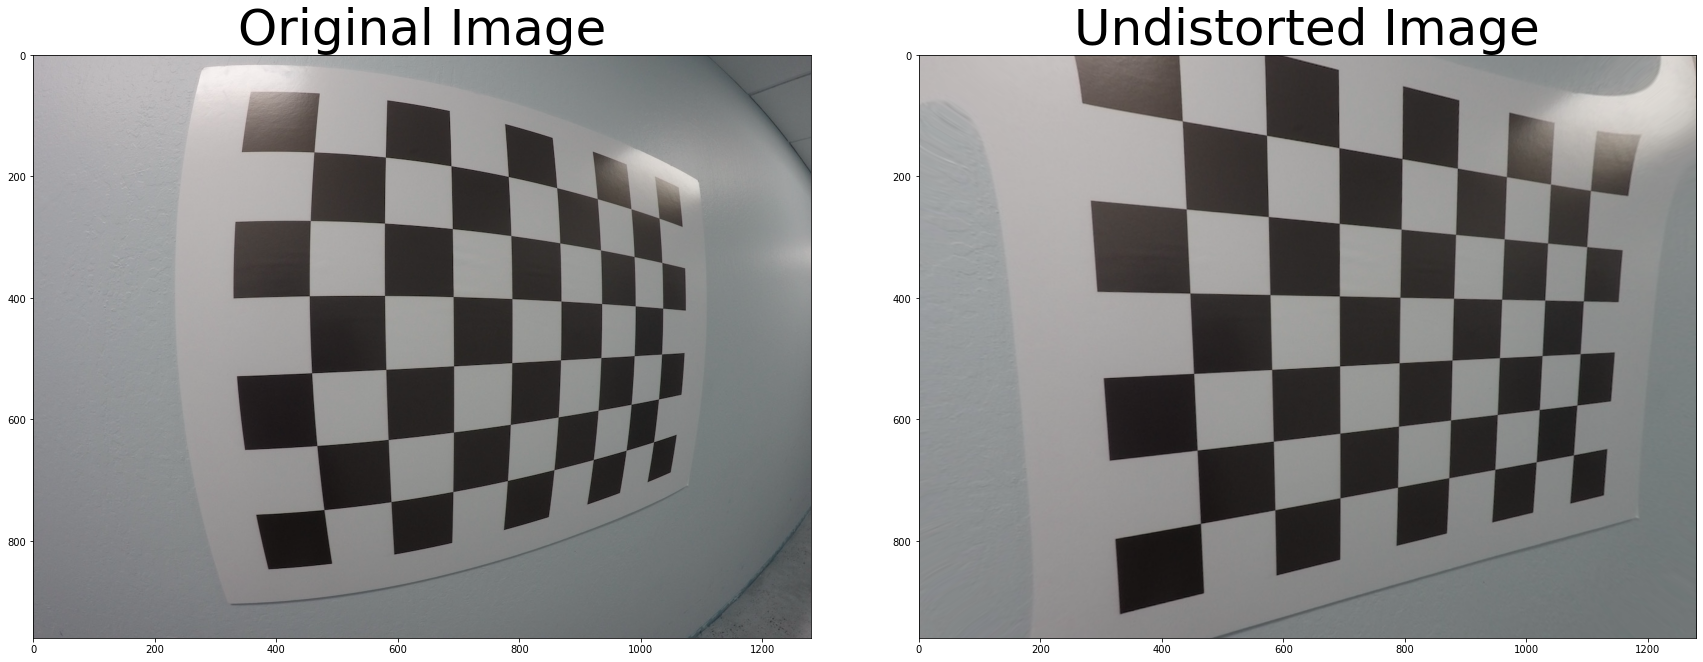

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)